# Figuras TSeries

#### Cargamos las librerias y los datos

In [39]:
library(ggplot2)
library(zoo)
library(forecast)
library(tseries)

datos <- read.csv('monthly-traffic-fatalities-in-on.csv')
accidentes <- ts(datos, start = c(1960, 1), frequency = 12)
accidentes.zoo <- zoo(datos, order.by = seq.Date(from = as.Date('1960/01/01'), by = 'month',
                                                 length.out = nrow(datos)), frequency = 12)
colnames(accidentes.zoo) <- 'accidentes'

#### Figura 24

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


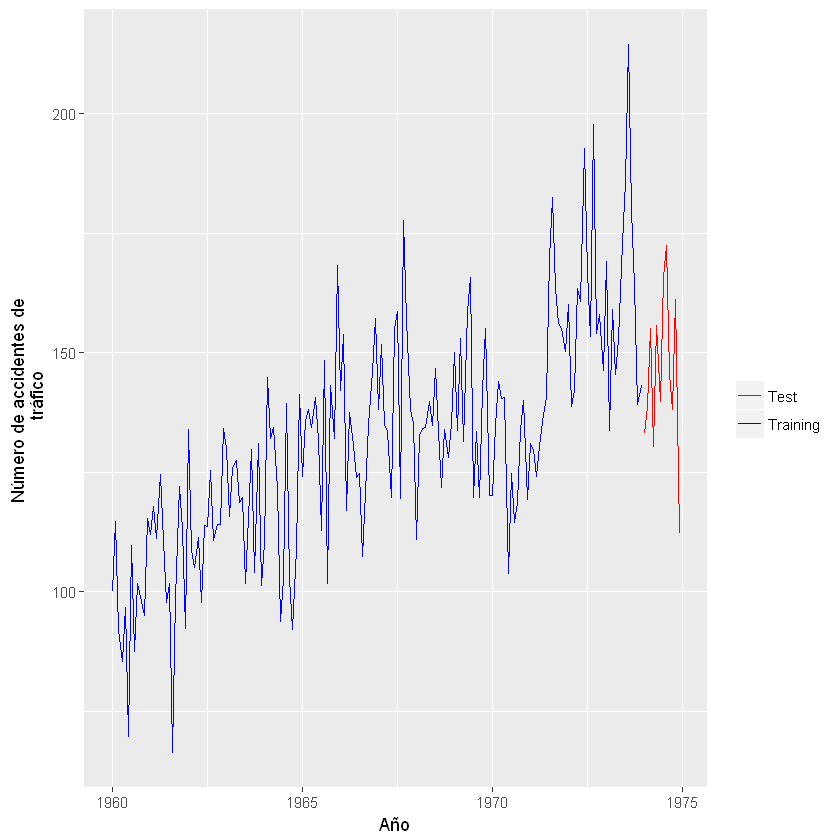

In [40]:
decomposition <- decompose(accidentes, type = 'additive')
accidentes.adj <- seasadj(decomposition)
acc.train.adj <- window(accidentes.adj, start = c(1960,1), end = c(1973,12))
acc.test.adj <- window(accidentes.adj, start = c(1974,1))
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.adj)), y = coredata(as.zoo(acc.train.adj)), colour = 'Training')) +
  geom_line(aes(x = index(as.zoo(acc.test.adj)), y = coredata(as.zoo(acc.test.adj)), colour = 'Test')) +
  scale_color_manual(name = '', values = c('Training' = 'blue', 'Test' = 'red'),
                     labels = c('Test','Training')) +
  xlab('Año') + ylab('Número de accidentes de \n tráfico')
figura

#### Figura 25

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


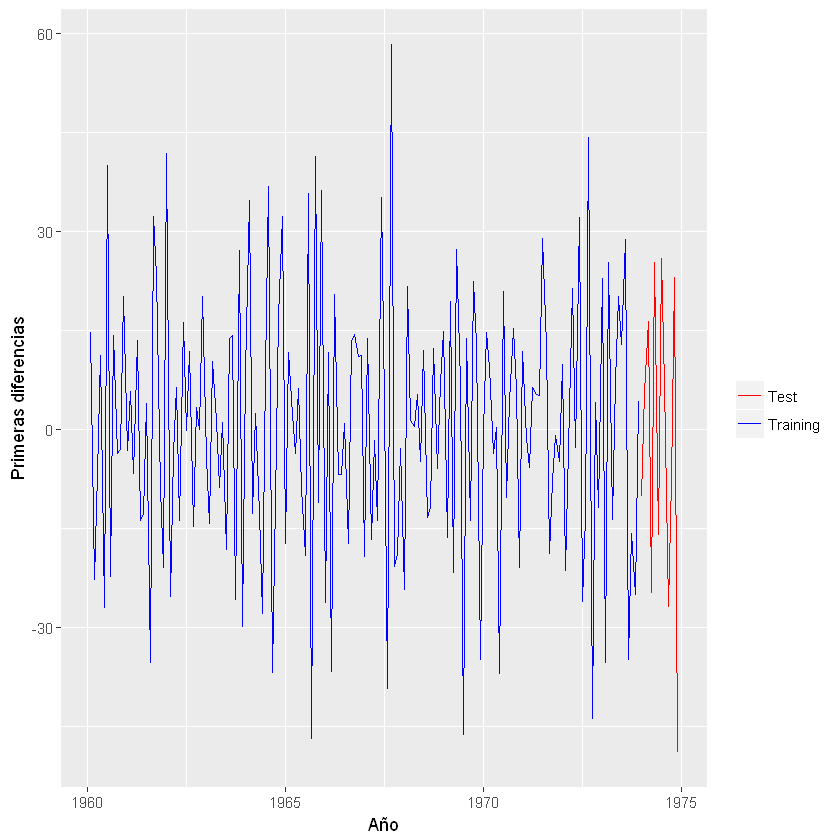

In [41]:
accidentes.dif.adj <- diff(accidentes.adj) 
acc.train.dif.adj <- window(accidentes.dif.adj, start = c(1960,2), end = c(1973,12)) # Perdemos una observación
acc.test.dif.adj <- window(accidentes.dif.adj, start = c(1974,1))
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)), y = coredata(as.zoo(acc.train.dif.adj)), colour = 'Training')) +
  geom_line(aes(x = index(as.zoo(acc.test.dif.adj)), y = coredata(as.zoo(acc.test.dif.adj)), colour = 'Test')) +
  scale_color_manual(name = '', values = c('Training' = 'blue', 'Test' = 'red'),
                     labels = c('Test','Training')) +
  xlab('Año') + ylab('Primeras diferencias')
figura

#### Figura 26

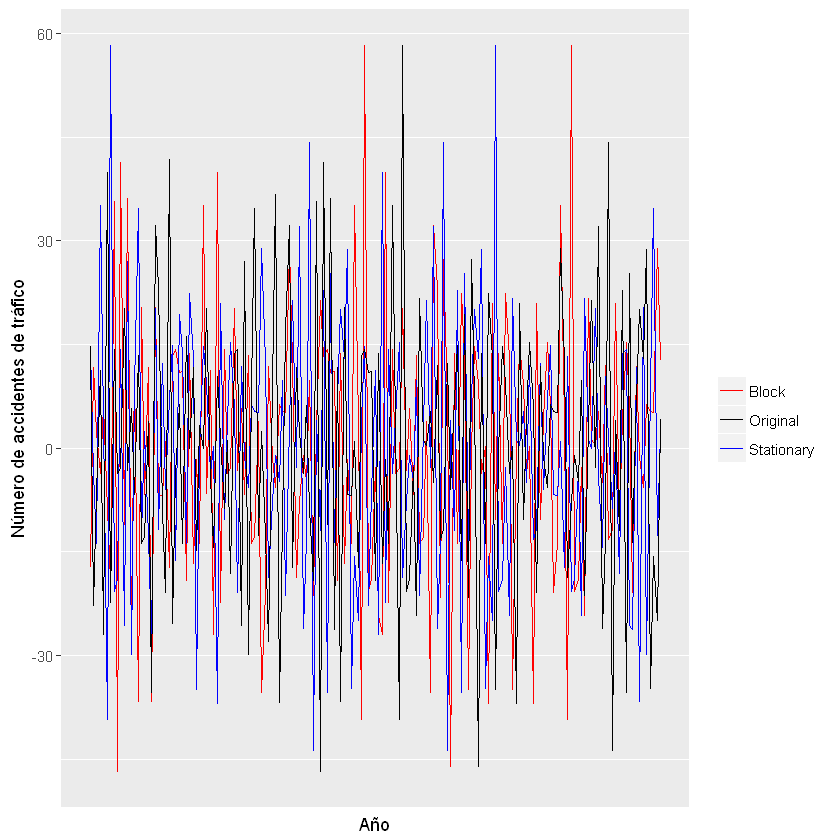

In [42]:
boots.block <- tsbootstrap(acc.train.dif.adj, type = 'block')
boots.stationary <- tsbootstrap(acc.train.dif.adj, type = 'stationary')
p <- ggplot() +
  geom_line(aes(x = index(acc.train.dif.adj),
                y = coredata(as.zoo(boots.block)), colour = 'Block')) +
  geom_line(aes(x = index(acc.train.dif.adj),
                y = coredata(as.zoo(boots.stationary)), colour = 'Stationary')) +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(acc.train.dif.adj), colour = 'Original')) +
  scale_color_manual(name = '', values = c('Original' = 'black', 'Block' = 'red', 'Stationary' = 'blue'),
                     labels = c('Block','Original', 'Stationary')) +
  xlab('Año') + ylab('Número de accidentes de tráfico') +
  scale_x_continuous(breaks = c(), labels = c())
p

#### Figura 27

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


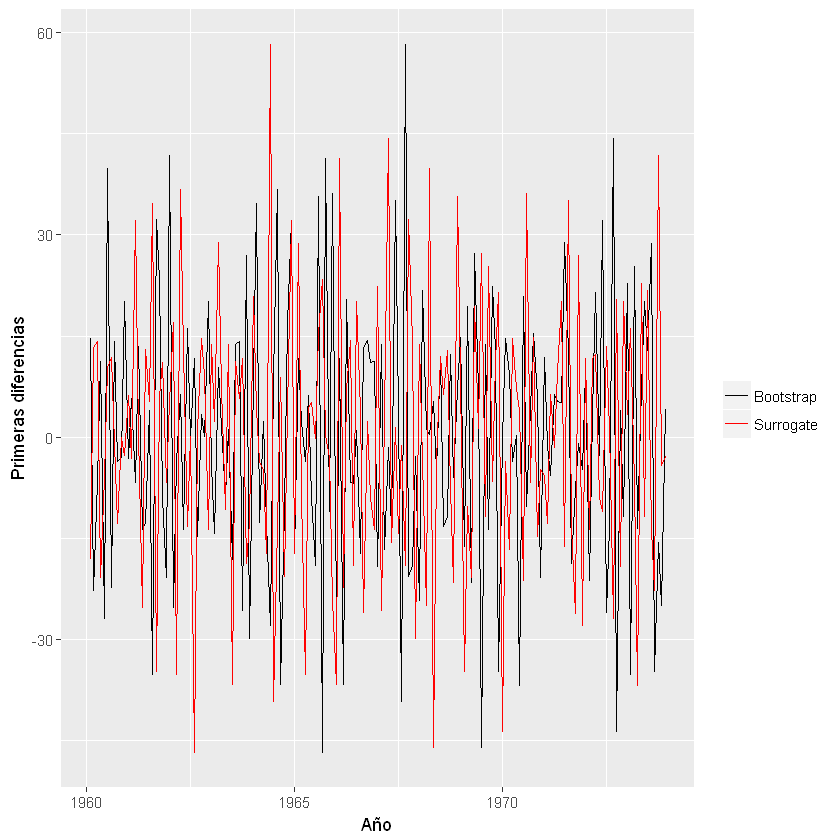

In [43]:
surr <- surrogate(acc.train.dif.adj, ns = 1, fft = TRUE, amplitude = TRUE)
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)), y = coredata(as.zoo(acc.train.dif.adj)), colour = 'Original')) +
  geom_line(aes(x = index(as.zoo(surr)), y = coredata(as.zoo(surr)), colour = 'Surrogated')) +
  scale_color_manual(name = '', values = c('Original' = 'black', 'Surrogated' = 'red'),
                     labels = c('Bootstrap','Surrogate')) +
  xlab('Año') + ylab('Primeras diferencias')
figura

#### Figura 28

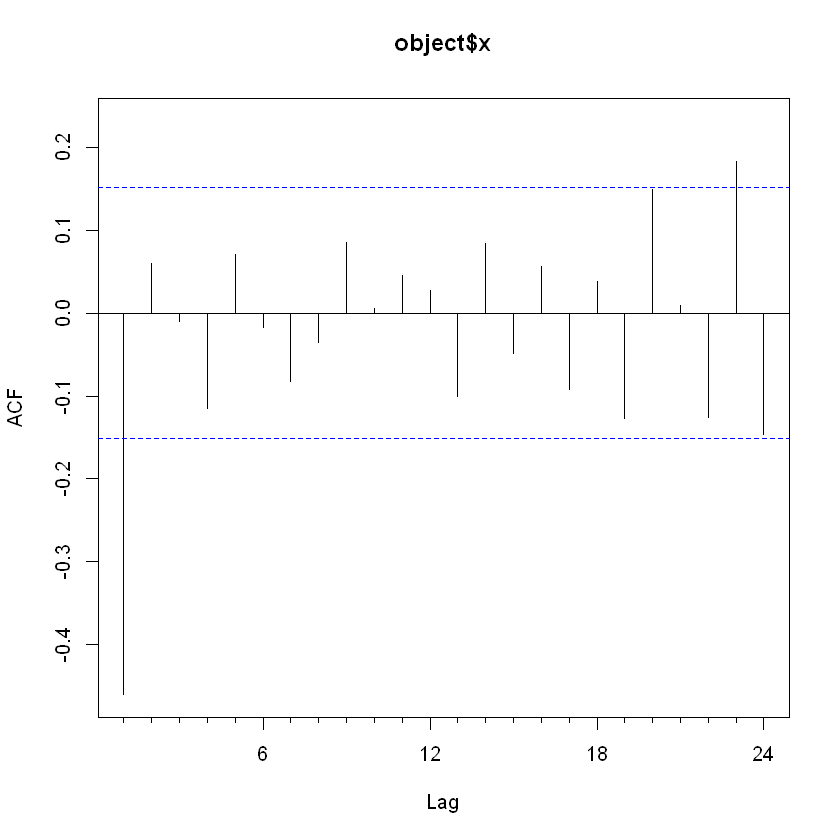

In [44]:
Acf(acc.train.dif.adj)

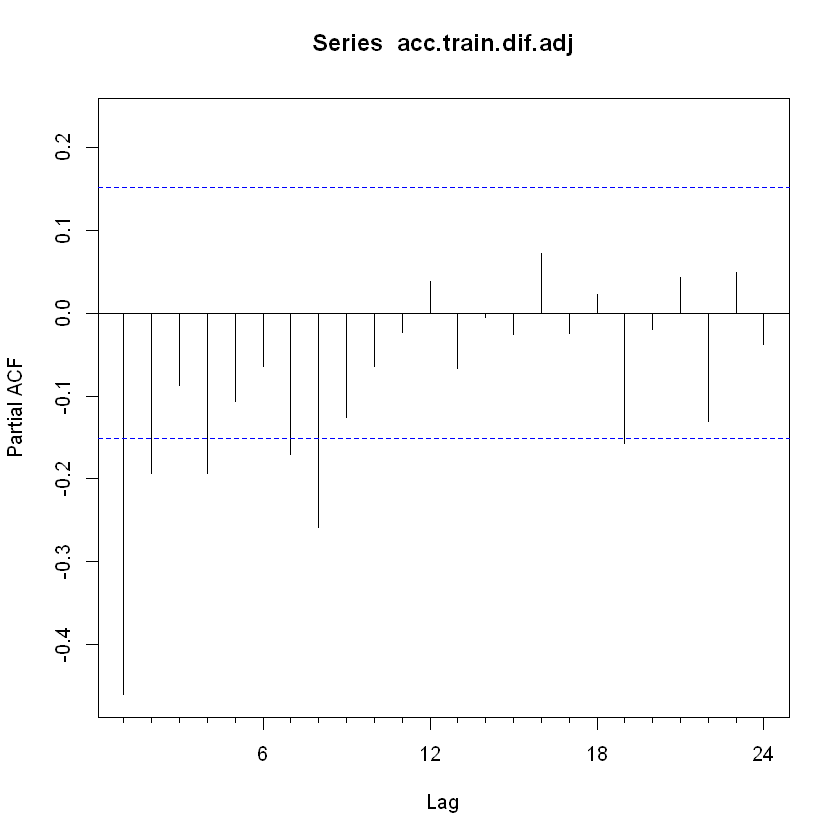

In [45]:
Pacf(acc.train.dif.adj)

#### Figura 29

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Warning message:
"Removed 2 rows containing missing values (geom_path)."

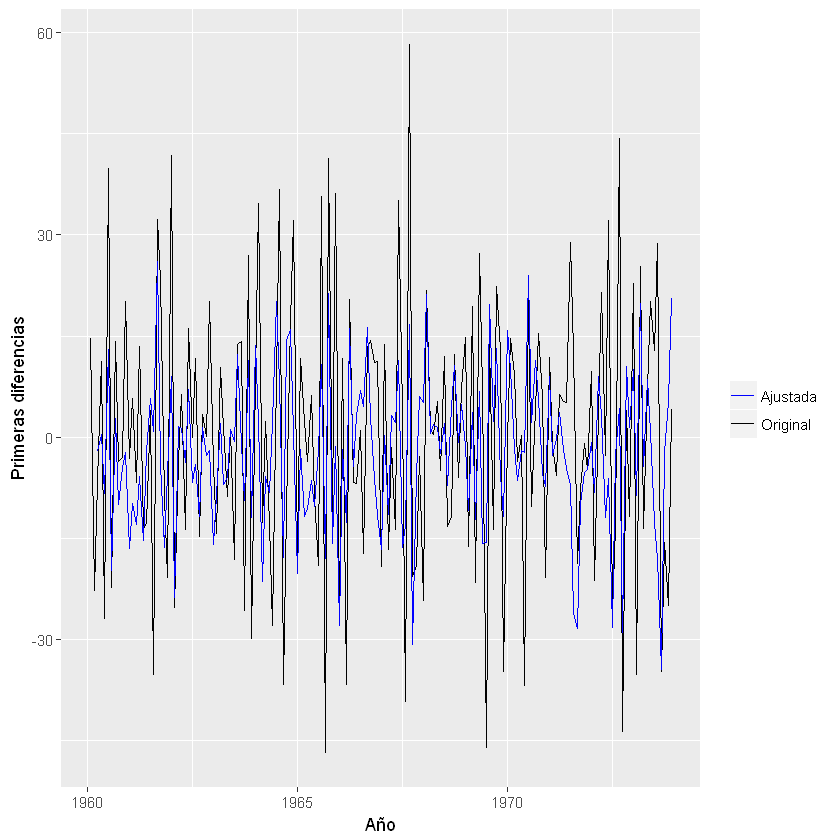

In [46]:
model <- arma(acc.train.dif.adj, order = c(2,1), include.intercept = FALSE)
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)), y = coredata(as.zoo(acc.train.dif.adj)), colour = 'Original')) +
  geom_line(aes(x = index(as.zoo(fitted(model))), y = coredata(as.zoo(fitted(model))), colour = 'Ajustada')) +
  scale_color_manual(name = '', values = c('Original' = 'black', 'Ajustada' = 'blue'),
                     labels = c('Ajustada', 'Original')) +
  xlab('Año') + ylab('Primeras diferencias')
figura